<a href="https://colab.research.google.com/github/MeikoFudo/CoursePaper/blob/main/Sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec
import seaborn as sns
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
import tensorflow as tf

if tf.test.is_gpu_available():
    print("GPU доступен!")
else:
    print("GPU недоступен")

with tf.device("/GPU:0"):
    pass


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU недоступен


In [3]:
import pandas as pd
import ssl


class CryptoData:
    def __init__(self, url: str):
        ssl._create_default_https_context = ssl._create_unverified_context
        self.df = pd.read_csv(url, delimiter=",", skiprows=[0])
    
    def get_dataframe(self) -> pd.DataFrame:
        return self.df

In [4]:
url = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
crypto_data = CryptoData(url)
data = crypto_data.get_dataframe()

In [5]:
data

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,1683331200000,2023-05-06,BTCUSDT,29505.60,29820.00,28300.00,28848.20,49249.284590,1.429518e+09,1221021
1,1683244800000,2023-05-05,BTCUSDT,28838.16,29677.00,28800.00,29505.61,58415.830480,1.709787e+09,1288027
2,1683158400000,2023-05-04,BTCUSDT,29026.16,29379.83,28663.64,28838.16,42575.475010,1.233816e+09,961542
3,1683072000000,2023-05-03,BTCUSDT,28669.85,29266.66,28113.69,29026.16,64615.792130,1.845961e+09,1502909
4,1682985600000,2023-05-02,BTCUSDT,28068.26,28879.88,27872.00,28669.86,50824.522400,1.441734e+09,1174697
...,...,...,...,...,...,...,...,...,...,...
2084,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
2085,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
2086,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
2087,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unix         2089 non-null   int64  
 1   Date         2089 non-null   object 
 2   Symbol       2089 non-null   object 
 3   Open         2089 non-null   float64
 4   High         2089 non-null   float64
 5   Low          2089 non-null   float64
 6   Close        2089 non-null   float64
 7   Volume BTC   2089 non-null   float64
 8   Volume USDT  2089 non-null   float64
 9   tradecount   2089 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 163.3+ KB


In [7]:
data.describe()

,Unix,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
count,2.089000e+03,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2.089000e+03,2.089000e+03
mean,1.593130e+12,19726.716678,20271.246994,19113.090431,19738.556549,77562.143640,1.684194e+09,1.488098e+06
std,5.211533e+10,16293.148287,16739.423978,15777.031620,16290.916064,88109.155090,2.149352e+09,2.094711e+06
min,1.502928e+12,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03
25%,1.548029e+12,7468.860000,7697.330000,7279.020000,7482.390000,31463.162801,2.587029e+08,2.713270e+05
50%,1.593130e+12,11219.680000,11557.000000,10842.690000,11251.000000,48760.717679,6.716466e+08,7.320730e+05
75%,1.638230e+12,29472.770000,30343.270000,28839.210000,29472.770000,82848.688746,2.486079e+09,1.629379e+06
max,1.683331e+12,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783,1.746531e+10,1.522359e+07


In [8]:
data= data.sort_values(by='Date')
data

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
2088,1502928000000,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
2087,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2086,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
2085,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
2084,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
...,...,...,...,...,...,...,...,...,...,...
4,1682985600000,2023-05-02,BTCUSDT,28068.26,28879.88,27872.00,28669.86,50824.522400,1.441734e+09,1174697
3,1683072000000,2023-05-03,BTCUSDT,28669.85,29266.66,28113.69,29026.16,64615.792130,1.845961e+09,1502909
2,1683158400000,2023-05-04,BTCUSDT,29026.16,29379.83,28663.64,28838.16,42575.475010,1.233816e+09,961542
1,1683244800000,2023-05-05,BTCUSDT,28838.16,29677.00,28800.00,29505.61,58415.830480,1.709787e+09,1288027


In [9]:
data.reset_index(inplace=True)
data

,index,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,2088,1502928000000,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
1,2087,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2,2086,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
3,2085,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
4,2084,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
...,...,...,...,...,...,...,...,...,...,...,...
2084,4,1682985600000,2023-05-02,BTCUSDT,28068.26,28879.88,27872.00,28669.86,50824.522400,1.441734e+09,1174697
2085,3,1683072000000,2023-05-03,BTCUSDT,28669.85,29266.66,28113.69,29026.16,64615.792130,1.845961e+09,1502909
2086,2,1683158400000,2023-05-04,BTCUSDT,29026.16,29379.83,28663.64,28838.16,42575.475010,1.233816e+09,961542
2087,1,1683244800000,2023-05-05,BTCUSDT,28838.16,29677.00,28800.00,29505.61,58415.830480,1.709787e+09,1288027


In [10]:
data['Date'] = pd.to_datetime(data['Date'])
type(data.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
class BitcoinVisualizer:
    def __init__(self, df):
        self.df = df
        
    def plot_bitcoin_prices(self):
        sns.despine(left=True, bottom=True)
        sns.lineplot(x=data['Date'], y=data['Close'])
        plt.title('Bitcoin Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.show()

    def plot_bitcoin_scatter(prices_df):
        sns.lineplot(x=data['Date'], y=data['Close'])
        plt.title('Bitcoin Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.grid(True)
        plt.scatter(data['Date'], data['Close'])
        plt.xlabel('Дата')
        plt.ylabel('Котировки акций')
        plt.title('Диаграмма рассеивания котировок акций биткоина')
        plt.show()

    def plot_bitcoin_distribution(self):
        sns.histplot(data['Close'], bins=20)
        sns.despine(left=True)
        plt.title('Распределение цен на биткоин')
        plt.xlabel('Цена (USD)')
        plt.ylabel('Количество')
        plt.show()

    def plot_bitcoin_boxplot(self, nrows, ncols):
        data_new = self.df.drop(['Date', 'Volume BTC','Volume USDT', 'Symbol'], axis=1)
        fig = plt.figure(figsize=(24, 12))
        spec = GridSpec(ncols=ncols, nrows=nrows, figure=fig, top=1.3)
        my_id = 0
        for i in range(nrows):
            for j in range(ncols):
                if i == nrows-1:
                    ax = fig.add_subplot(spec[i, :])
                    sns.boxplot(data_new.iloc[:, my_id])
                    ax.set_title(data_new.columns[my_id])
                    break
                ax = fig.add_subplot(spec[i, j])
                sns.boxplot(data_new.iloc[:, my_id])
                ax.set_title(data_new.columns[my_id])
                my_id += 1
        plt.show()

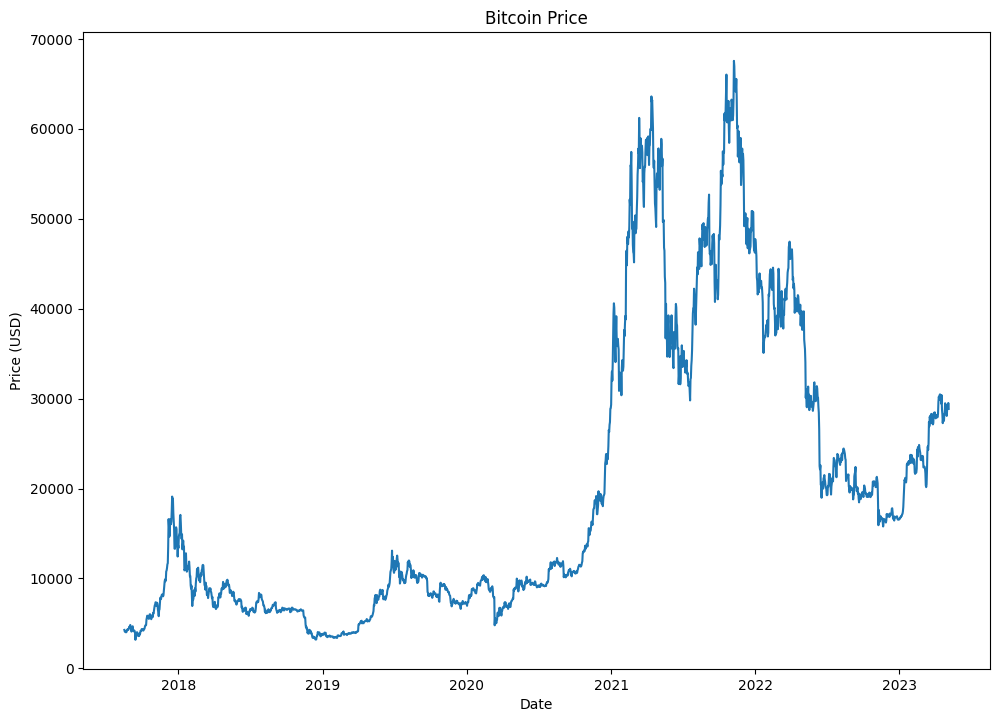

In [12]:
visualizer = BitcoinVisualizer(data)
visualizer.plot_bitcoin_prices()

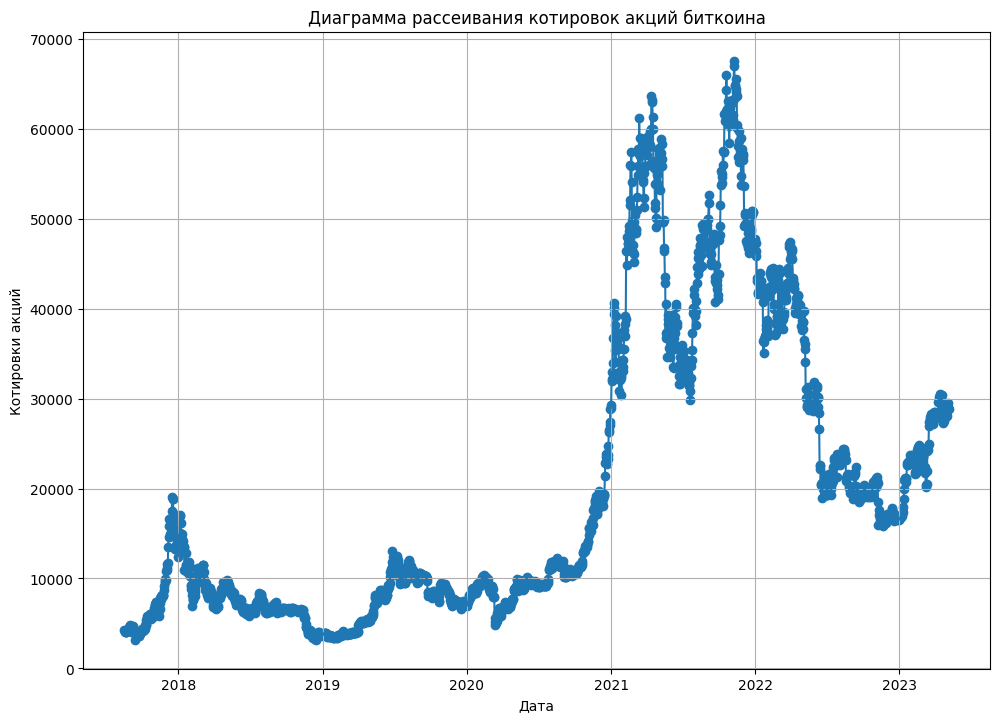

In [13]:
visualizer.plot_bitcoin_scatter()

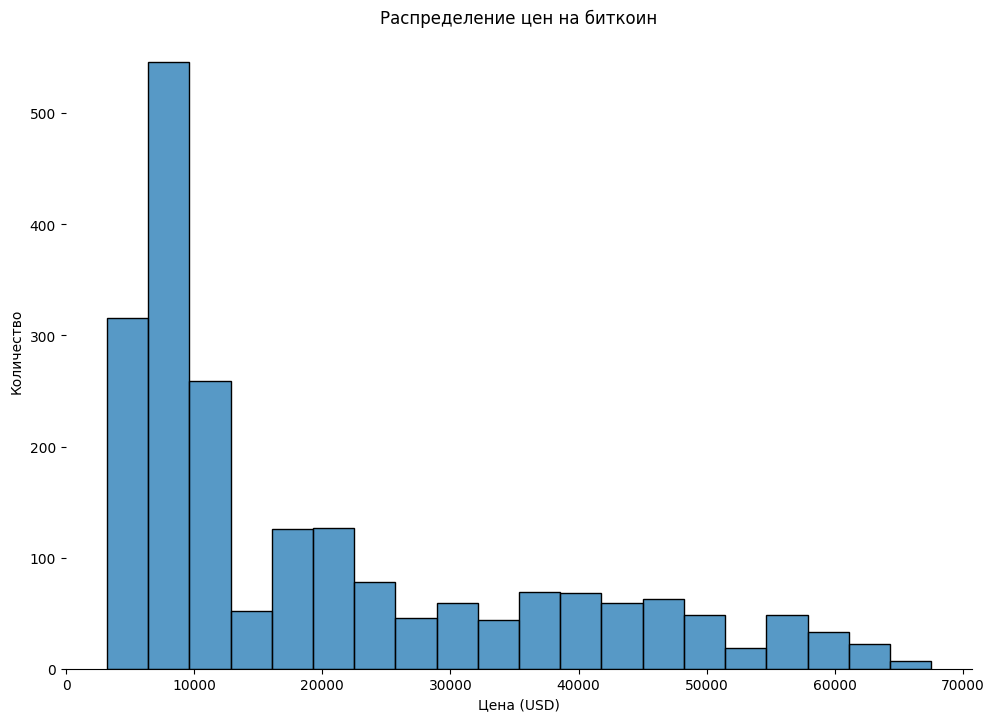

In [14]:
visualizer.plot_bitcoin_distribution()

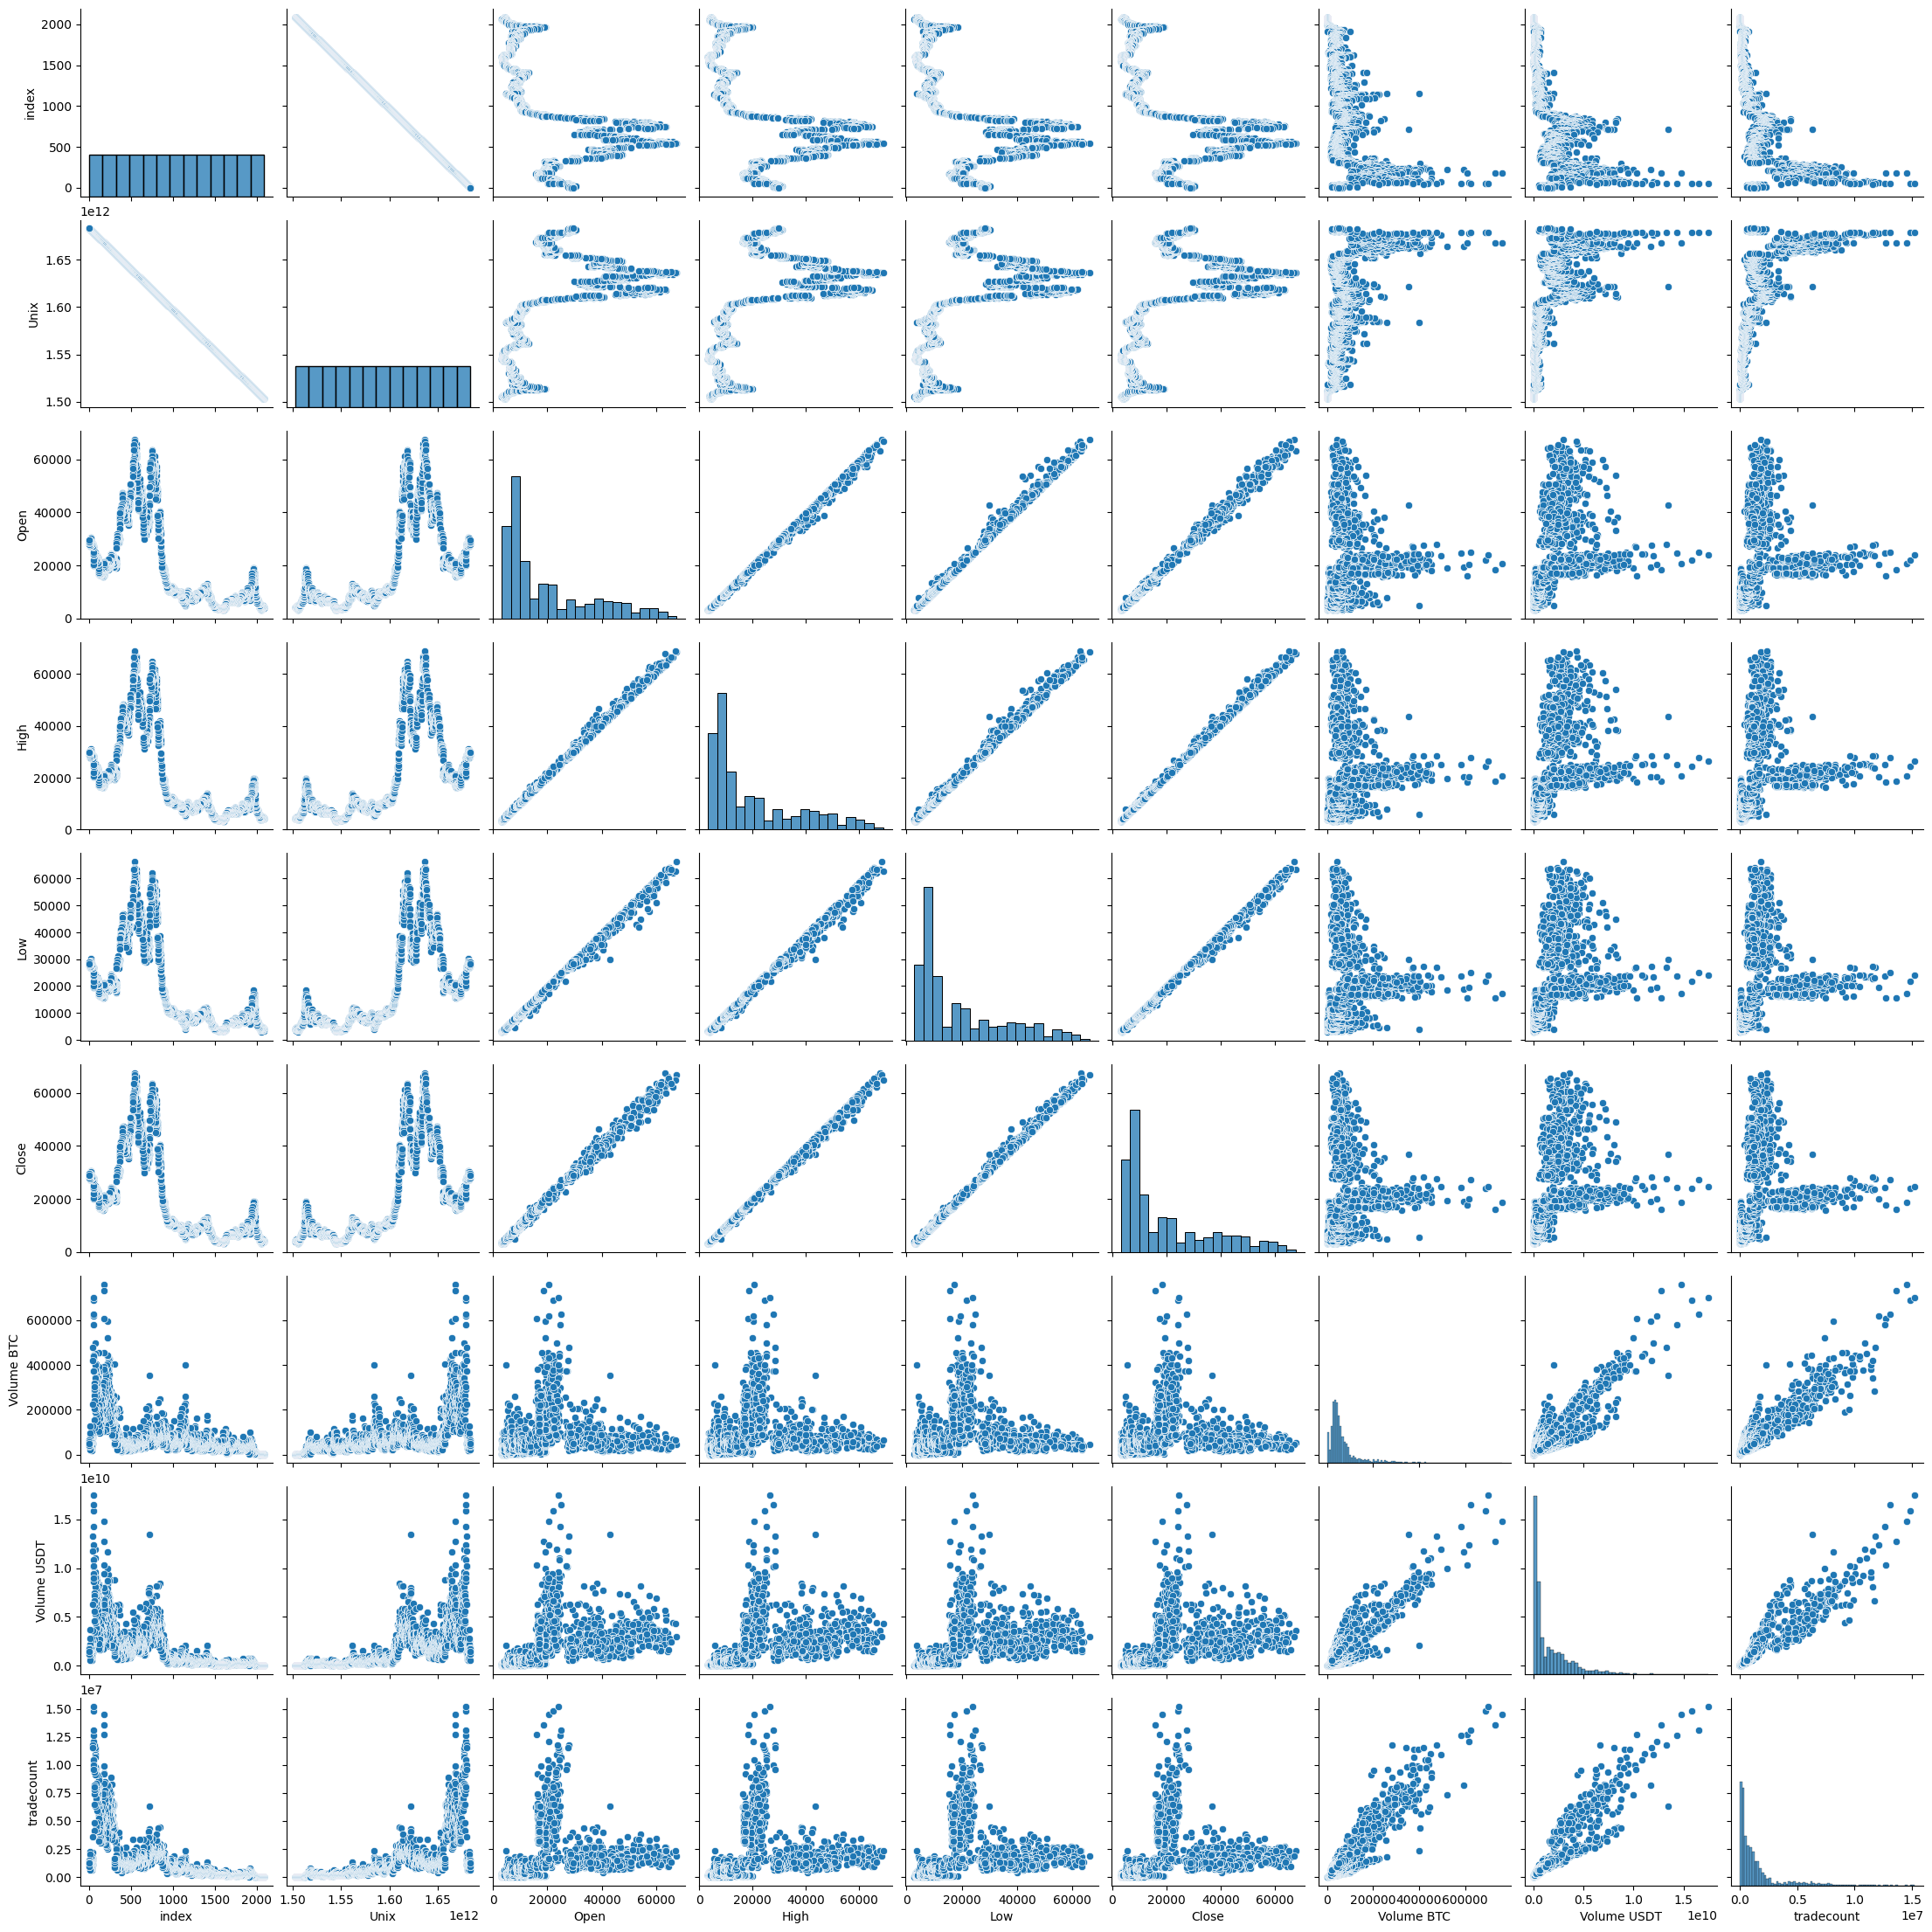

In [15]:
sns.pairplot(data)

plt.show()

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

class BitcoinPricePreprocessor:
    
    def __init__(self, df):
        self.df = df
        
    def count_missing_values(self):
        missing_values = self.df.isna().sum().sum()
        print(f'Количество пропущенных значений: {missing_values}')
        
    def fill_missing_values(self, method='ffill'):
        self.df.fillna(method=method, inplace=True)
        
    def normalize_data(self):
        scaler = MinMaxScaler()
        self.df[['Open', 'High', 'Low', 'Close',' Volume BTC','	Volume USDT']] = scaler.fit_transform(self.df[['Open', 'High', 'Low', 'Close', 'Volume BTC','Volume USDT']])
        
    def preprocess_data(self):
        self.count_missing_values()
        self.fill_missing_values()
        self.normalize_data()
    
    def split_data(self, test_size=0.2):
        X = self.df.drop(columns=['Close'])
        y = self.df['Close']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
        return X_train, X_test, y_train, y_test


In [17]:
preprocessor = BitcoinPricePreprocessor(data)

preprocessor.count_missing_values()
preprocessor.fill_missing_values()
preprocessor.normalize_data()
X_train, X_test, y_train, y_test = preprocessor.split_data()

Количество пропущенных значений: 0


In [18]:
y_train

0       0.017036
1       0.014290
2       0.014781
3       0.013946
4       0.012854
          ...   
1666    0.563177
1667    0.552414
1668    0.553623
1669    0.537613
1670    0.567053
Name: Close, Length: 1671, dtype: float64

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

class BitcoinDataAnalyzer:
    
    def __init__(self, df):
        self.df = df
    
    def test_stationarity(self):
        # Проверка на стационарность ряда с помощью теста Дики-Фуллера
        result = sm.tsa.stattools.adfuller(self.df['Close'])
        print('Тест Дики-Фуллера:')
        print('ADF статистика: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))
        print('Критические значения:')
        for key, value in result[4].items():
            print('\t{}: {}'.format(key, value))
    
    def kendall_test(self):
        # Проверка на наличие тренда с помощью теста Манна-Кендалла
        result = stats.mstats.kendalltau(self.df['Close'], np.arange(len(self.df)))
        print('Тест Манна-Кендалла:')
        print('Значение статистики: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))

    
    def sen_estimator(self):
        # Оценка наклона тренда с помощью оценки Тейла-Сена
        x = np.arange(len(self.df))
        slope, intercept, lo_slope, up_slope = stats.theilslopes(self.df['Close'], x, alpha=0.05)
        print('Оценка Тейла-Сена:')
        print('Наклон: {}'.format(slope))
    
    def grubbs_test(self):
        # Проверка на наличие выбросов с помощью теста Граббса
        alpha = 0.05
        n = len(self.df)
        G_crit = stats.t.ppf(1 - alpha / (2 * n), n - 2)
        G_max = np.max(np.abs((self.df['Close'] - np.mean(self.df['Close'])) / np.std(self.df['Close'])))
        if G_max > G_crit:
            print('Тест Граббса:')
            print('Найден выброс: {}'.format(G_max))
        else:
            print('Тест Граббса:')
            print('Выбросы не найдены')
    
    def shapiro_wilk_test(self):
        # Проверка на нормальность распределения с помощью теста Шапиро-Уилка
        result = stats.shapiro(self.df['Close'])
        print('Тест Шапиро-Уилка:')
        print('Статистика: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))

In [21]:
analyzer = BitcoinDataAnalyzer(data)
analyzer.test_stationarity()
print('-'*70)
analyzer.kendall_test()
print('-'*70)
analyzer.sen_estimator()
print('-'*70)
analyzer.grubbs_test()
print('-'*70)
analyzer.shapiro_wilk_test()

Тест Дики-Фуллера:
ADF статистика: -1.5316294725310329
p-value: 0.5178107325961769
Критические значения:
	1%: -3.433522214824497
	5%: -2.8629413375753097
	10%: -2.5675160082120216
----------------------------------------------------------------------
Тест Манна-Кендалла:
Значение статистики: 0.5010918579835067
p-value: 3.2941425090127387e-258
----------------------------------------------------------------------
Оценка Тейла-Сена:
Наклон: 0.00017865343060610847
----------------------------------------------------------------------
Тест Граббса:
Выбросы не найдены
----------------------------------------------------------------------
Тест Шапиро-Уилка:
Статистика: 0.8342089653015137
p-value: 3.6181526348866777e-42


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(y_test,
 order=(1,1,1),
 seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


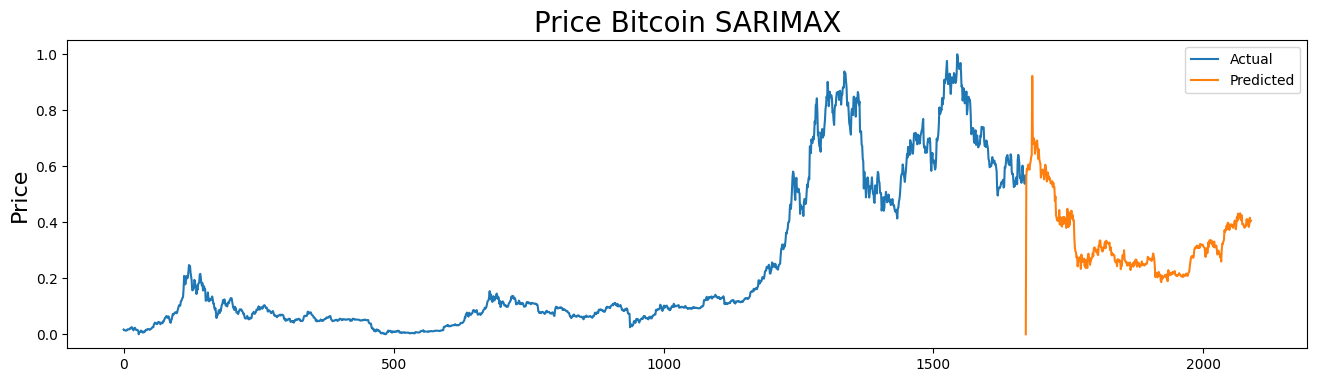

In [23]:
plt.figure(figsize=(16,4))
plt.plot(y_train, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Price Bitcoin SARIMAX', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.legend()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"MSE: {mse:.9f}")
print(f"MAE: {mae:.9f}")


MSE: 0.001113464
MAE: 0.012236777


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(y_train,
                 order=(1,1,1),
                 seasonal_order=(1,1,0,12))
model = sarima.fit()
forecast = model.predict(start=len(y_train), end=len(y_train)+29, dynamic=False)

# вывод предсказанных значений
print(forecast)


1671    0.557265
1672    0.519574
1673    0.509102
1674    0.513013
1675    0.501485
1676    0.515932
1677    0.545627
1678    0.527525
1679    0.510442
1680    0.558562
1681    0.562519
1682    0.570850
1683    0.554010
1684    0.508646
1685    0.506218
1686    0.499421
1687    0.490585
1688    0.503403
1689    0.544432
1690    0.514521
1691    0.500982
1692    0.522801
1693    0.515563
1694    0.535728
1695    0.522843
1696    0.481781
1697    0.474843
1698    0.474049
1699    0.463704
1700    0.477435
Name: predicted_mean, dtype: float64
